In [1]:
%matplotlib inline

In [2]:
import pickle as pk
import numpy as np

In [3]:
with open('./results_tokyo/evaluation_local_nll.pk', 'rb') as f:
    local_nll_tokyo = pk.load(f)
with open('./results_osaka/evaluation_local_nll.pk', 'rb') as f:
    local_nll_osaka = pk.load(f)
with open('./results_tokyo/evaluation_local_rank.pk', 'rb') as f:
    local_rank_tokyo = pk.load(f)
with open('./results_osaka/evaluation_local_rank.pk', 'rb') as f:
    local_rank_osaka = pk.load(f)
    
with open('./results_tokyo/evaluation_local_nll_fl.pk', 'rb') as f:
    local_fl_nll_tokyo = pk.load(f)
with open('./results_osaka/evaluation_local_nll_fl.pk', 'rb') as f:
    local_fl_nll_osaka = pk.load(f)
with open('./results_tokyo/evaluation_local_rank_fl.pk', 'rb') as f:
    local_fl_rank_tokyo = pk.load(f)
with open('./results_osaka/evaluation_local_rank_fl.pk', 'rb') as f:
    local_fl_rank_osaka = pk.load(f)
    
with open('./to_move_tokyo/evaluation_local_fed_inc_nll.pk', 'rb') as f:
    local_fl_inc_nll_tokyo = pk.load(f)
with open('./to_move_osaka/evaluation_local_fed_inc_nll.pk', 'rb') as f:
    local_fl_inc_nll_osaka = pk.load(f)
with open('./to_move_tokyo/evaluation_local_rank_fed_inc.pk', 'rb') as f:
    local_fl_inc_rank_tokyo = pk.load(f)
with open('./to_move_osaka/evaluation_local_rank_fed_inc.pk', 'rb') as f:
    local_fl_inc_rank_osaka = pk.load(f)
    
with open('./results_tokyo/evaluation_global_nll.pk', 'rb') as f:
    global_nll_tokyo = pk.load(f)
with open('./results_osaka/evaluation_global_nll.pk', 'rb') as f:
    global_nll_osaka = pk.load(f)
with open('./results_tokyo/evaluation_global_rank.pk', 'rb') as f:
    global_rank_tokyo = pk.load(f)
with open('./results_osaka/evaluation_global_rank.pk', 'rb') as f:
    global_rank_osaka = pk.load(f)
    
with open('./results_tokyo/pmm_metrics.pk', 'rb') as f:
    pmm_tokyo = pk.load(f)
with open('./results_osaka/pmm_metrics.pk', 'rb') as f:
    pmm_osaka = pk.load(f)
    
with open('./to_move_tokyo/evaluation_local_deepmove_nll.pk', 'rb') as f:
    deepmove_nll_tokyo = pk.load(f)
with open('./to_move_osaka/evaluation_local_deepmove_nll.pk', 'rb') as f:
    deepmove_nll_osaka = pk.load(f)
with open('./to_move_tokyo/evaluation_local_rank_deepmove.pk', 'rb') as f:
    deepmove_rank_tokyo = pk.load(f)
with open('./to_move_osaka/evaluation_local_rank_deepmove.pk', 'rb') as f:
    deepmove_rank_osaka = pk.load(f)
    
with open('./to_move_tokyo/evaluation_markov_model_nll.pk', 'rb') as f:
    markov_nll_tokyo = pk.load(f)
with open('./to_move_osaka/evaluation_markov_model_nll.pk', 'rb') as f:
    markov_nll_osaka = pk.load(f)
with open('./to_move_tokyo/evaluation_markov_model_ranking.pk', 'rb') as f:
    markov_rank_tokyo = pk.load(f)
with open('./to_move_osaka/evaluation_markov_model_ranking.pk', 'rb') as f:
    markov_rank_osaka = pk.load(f)

In [4]:
def combine(nll_dict, rank_dict):
    combine = dict({})
    for dt in rank_dict:
        if len(dt) == 3:
            if type(nll_dict[dt]) == float:
                combine[dt] = (nll_dict[dt],) + (rank_dict[dt])
            else:
                combine[dt] = (nll_dict[dt].item(),) + (rank_dict(dt))
                
    return combine

In [5]:
def format_date(metric_dict):
    metric_dict_formatted = dict({})
    
    for dt in metric_dict:
        metric_dict_formatted['{:04d}-{:02d}-{:02d}'.format(dt[0], dt[1], dt[2])] = metric_dict[dt]
    return metric_dict_formatted

In [6]:
local_tokyo = format_date(combine(local_nll_tokyo, local_rank_tokyo))
local_osaka = format_date(combine(local_nll_osaka, local_rank_osaka))
local_fl_tokyo = format_date(combine(local_fl_nll_tokyo, local_fl_rank_tokyo))
local_fl_osaka = format_date(combine(local_fl_nll_osaka, local_fl_rank_osaka))
local_fl_inc_tokyo = format_date(combine(local_fl_inc_nll_tokyo, local_fl_inc_rank_tokyo))
local_fl_inc_osaka = format_date(combine(local_fl_inc_nll_osaka, local_fl_inc_rank_osaka))
global_tokyo = format_date(combine(global_nll_tokyo, global_rank_tokyo))
global_osaka = format_date(combine(global_nll_osaka, global_rank_osaka))
deepmove_tokyo = format_date(combine(deepmove_nll_tokyo, deepmove_rank_tokyo))
deepmove_osaka = format_date(combine(deepmove_nll_osaka, deepmove_rank_osaka))
markov_tokyo = format_date(combine(markov_nll_tokyo, markov_rank_tokyo))
markov_osaka = format_date(combine(markov_nll_osaka, markov_rank_osaka))

In [7]:
pmm_tokyo = format_date(pmm_tokyo)
pmm_osaka = format_date(pmm_osaka)

In [8]:
import pandas as pd

In [9]:
import matplotlib.pyplot as plt

In [10]:
df_tokyo = pd.concat([pd.DataFrame.from_dict(local_tokyo).T,
           pd.DataFrame.from_dict(local_fl_tokyo).T,
           pd.DataFrame.from_dict(local_fl_inc_tokyo).T,
           pd.DataFrame.from_dict(global_tokyo).T,
           pd.DataFrame.from_dict(deepmove_tokyo).T,
           pd.DataFrame.from_dict(markov_tokyo).T,
           pd.DataFrame.from_dict(pmm_tokyo).T
          ], axis=1)

In [11]:
df_osaka = pd.concat([pd.DataFrame.from_dict(local_osaka).T,
           pd.DataFrame.from_dict(local_fl_osaka).T,
           pd.DataFrame.from_dict(local_fl_inc_osaka).T,
           pd.DataFrame.from_dict(global_osaka).T,
           pd.DataFrame.from_dict(deepmove_osaka).T,
           pd.DataFrame.from_dict(markov_osaka).T,
           pd.DataFrame.from_dict(pmm_osaka).T
          ], axis=1)

In [14]:
models_name = ['Ours_centralized', 'Ours_fl', 'Ours_fl_pretrain', 'GRU', 'DeepMove', 'Markov', 'PMM']

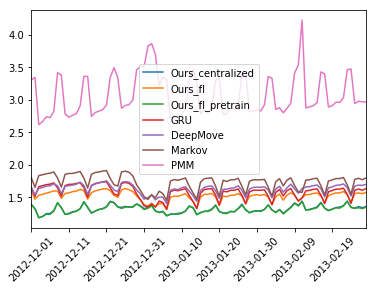

In [15]:
df = df_tokyo[0]
df.columns = models_name
df.plot(rot=45)

In [16]:
df_twocity = [df_tokyo, df_osaka]

In [17]:
df_twocity[1][0].mean()

0    1.393391
0    1.317460
0    1.374591
0    1.617952
0    1.680020
0    1.787533
0    3.023348
dtype: float64

In [18]:
df_twocity[1][1].mean()

1    0.816777
1    0.818423
1    0.814171
1    0.795618
1    0.809456
1    0.794712
1    0.602413
dtype: float64

In [19]:
df_twocity[1][2].mean()

2     22.805924
2     18.906596
2     23.223302
2     27.317380
2     23.175894
2     46.350523
2    113.889776
dtype: float64

In [20]:
df_twocity[1][3].mean()

3    0.874786
3    0.878235
3    0.873688
3    0.835203
3    0.868814
3    0.834437
3    0.735459
dtype: float64

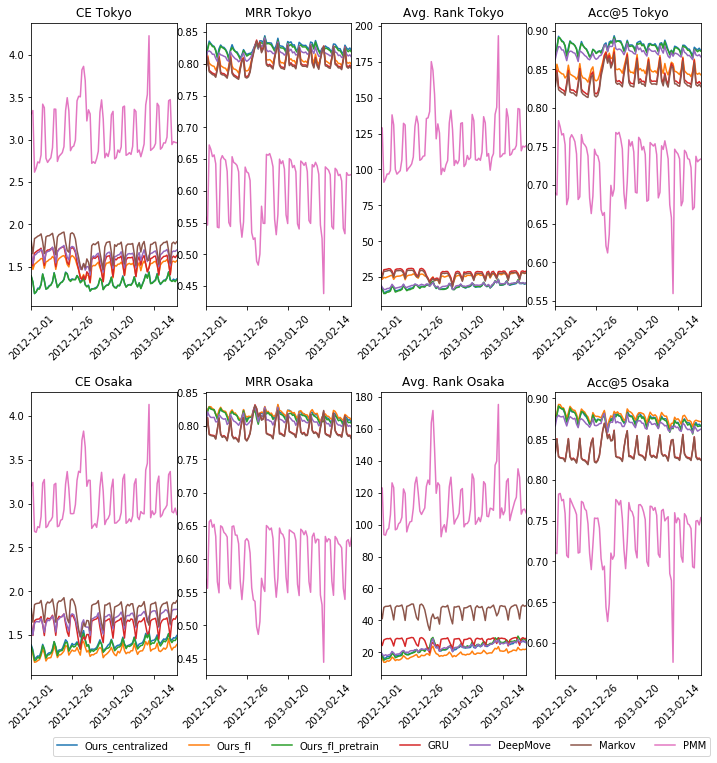

In [32]:
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(12, 12))

metric_name = ['CE', 'MRR', 'Avg. Rank', 'Acc@5']
city_name = ['Tokyo', 'Osaka']

for rid, row in enumerate(ax):
    for cid, col in enumerate(row):
        df = df_twocity[rid][cid]
        df.columns = models_name
        df.plot(ax=col, rot=45, title=metric_name[cid] + ' ' + city_name[rid], legend=False)
        
plt.subplots_adjust(hspace=0.3)
plt.legend(bbox_to_anchor=(1.1, -0.2), ncol=7)
plt.show()